___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />


# SEGUNDO EXAMEN PARCIAL
# SIMULACIÓN DE PROCESOS FINANCIEROS

## Nombre: Esteban Limón Ochoa

## Fecha: 19 de Octubre del 2018

## Por: Oscar David Jaramillo Z.

In [1]:
import numpy as np
import scipy.stats as st     # Librería estadística
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import triang
import scipy.special as sps
from itertools import cycle
import scipy.stats as st
import scipy.special as sps 
import math
%matplotlib inline


# 1.
La financiera ”El cerdito feliz” atiende la apertura de cuentas de ahorro en su sucursal matriz, en esta sucursal se tienen 4 ejecutivos para atención al inversionista, teniendo una media de tiempo para la atención de un cliente de 30 minutos, aunque con frecuencia se requiere que uno de los ejecutivos participe en juntas de evaluación de crédito, lo que provoca que el equipo de atención disminuya a 3 ejecutivos y en estas circunstancias el promedio de atención por cliente aumenta a 45 minutos. El tiempo entre la llegada de cada cliente en promedio es de 25 minutos, si la apertura de la sucursal es a las 9:00 a.m. y cierra su atención al público a las 14:00 horas, realiza una simulación de mímino 1000 escenarios y responda
   a).Justifique que tipo de distribuciones de probabilidad va a utilizar para realizar montecarlo.
   
   b). ¿Cuántas personas se atenderán hasta las 14:00 horas, si el equipo está formado solo por 3 ejecutivos?, ¿cuántos quedarán en cola?
   
   c). ¿Cuántas personas se atenderán hasta las 14:00 horas, si el equipo está formado solo por 4 ejecutivos?, ¿Cuántos quedarán en cola?


In [2]:
mu4=30; mu3=45#min atencion cliente
peop4=4; peop3=3#ejecutivos
wait=25#minutos
worktime=(14-9)*60#tiempo que se trabaja
sim=1000#numero de simulaciones, dias que se va a correr
i=1
pat=0#personas atendidad


 a).Justifique que tipo de distribuciones de probabilidad va a utilizar para realizar montecarlo.

Para resolver el siguiente problema voy a utilizar la función de probabilidad de poison para generar variables aleatorias para las cuales solo se cuenta con su media. Este tipo de distribución se aplica para sucesos en un intervalo dado. Solo tenfo que ingresar la media  ex:

r = poisson.rvs(mu, size=1000)



In [3]:
#crear una fncion que
r=st.poisson.rvs(25,size=10)
def atbanc(empl:'media del tiempo de los empleados que atenderan la simulación'):
    atime=st.poisson.rvs(empl,size=sim)#tiempo de atencion
    watime=st.poisson.rvs(wait,size=sim)#tiempo de espera
    timeatt=0
    timea=0
    k=0
    j=0
    #tiempo de atencion
    while timeatt<=worktime:
            timeatt+=atime[j]
            j+=1
    totat=j
    while timea<= worktime:
            timea+=watime[k]
            k+=1
    #por lo que las personas que no fueron atendidas son la diferencia entre las que llegaron y las que fueron atendidas
    notattended=k-j
    return totat,notattended
            



In [4]:
help(atbanc)

Help on function atbanc in module __main__:

atbanc(empl:'media del tiempo de los empleados que atenderan la simulación')



In [5]:
d1b1=np.arange(sim)#simulation days 1 by 1

  b). ¿Cuántas personas se atenderán hasta las 14:00 horas, si el equipo está formado solo por 3 ejecutivos?, ¿cuántos quedarán en cola?

In [6]:
atenc=list(map(lambda x: atbanc(mu3),d1b1))
atenc=pd.DataFrame(atenc)
at=atenc.iloc[:,0]
nat=atenc.iloc[:,1]
tota=sum(at);totnat=sum(nat)
mat=np.mean(at);mnat=np.mean(nat)
perat=round(tota/(tota+totnat)*100,2)
print('En las ',sim,' simulaciones se atendieron ',tota,' con un promedio diario de ',mat)
print('En las ',sim,' simulaciones no se atendieron ',totnat,' con un promedio diario de ',mnat)
print('En promedio se atendio el: ',perat,'%.')

En las  1000  simulaciones se atendieron  7164  con un promedio diario de  7.164
En las  1000  simulaciones no se atendieron  5391  con un promedio diario de  5.391
En promedio se atendio el:  57.06 %.


   c). ¿Cuántas personas se atenderán hasta las 14:00 horas, si el equipo está formado solo por 4 ejecutivos?, ¿Cuántos quedarán en cola?

In [7]:
atenc=list(map(lambda x: atbanc(mu4),d1b1))
atenc=pd.DataFrame(atenc)
at=atenc.iloc[:,0]
nat=atenc.iloc[:,1]
tota=sum(at);totnat=sum(nat)
mat=np.mean(at);mnat=np.mean(nat)
perat=round(tota/(tota+totnat)*100,2)
print('En las ',sim,' simulaciones se atendieron ',tota,' con un promedio diario de ',mat)
print('En las ',sim,' simulaciones no se atendieron ',totnat,' con un promedio diario de ',mnat)
print('En promedio se atendio el: ',perat,'%.')
print('Por lo que si se quiere atender a más personas si es necesario contar con los 4 ejecutivos, e inclusive contratar a 1 más.')

En las  1000  simulaciones se atendieron  10515  con un promedio diario de  10.515
En las  1000  simulaciones no se atendieron  2027  con un promedio diario de  2.027
En promedio se atendio el:  83.84 %.
Por lo que si se quiere atender a más personas si es necesario contar con los 4 ejecutivos, e inclusive contratar a 1 más.


# 2 
a). Demuestre que la distribución de poisson satisface la siguiente forma recursiva de su probabilidad
$$ p(k+1)={\lambda \over k+1}p(k)$$

Realizar todo el desarrollo matemático en mardown usando ecuaciones latex.


$$p(k) = \frac{\lambda^{k}\mathrm{e}^{-\lambda}}{k!}$$



$$p(k+1)=\frac{\lambda ^{k+1}e^{-\lambda }}{(k+1)!}$$.

$$p(k+1)= \frac{\lambda ^{k}\lambda e^{-\lambda }}{(k+1)!}$$.

Por identidad matemática se puede decir que n! es igual
$$n! = n(n-1)! $$

$$p(k+1)=\frac{\lambda e^{-k}\lambda ^{k}}{(k+1)(k)!}$$.

Sabemos que:

$$p(k) = \frac{\lambda^{k}\mathrm{e}^{-\lambda}}{k!}$$

Por lo que:
$$p(k+1)= \frac{\lambda }{k+1}p(k) $$.

b). De el resultado demostrado en el inciso a) (usando la ecuación recursiva), gráfique la función de distribución de probabilidad y su función acumulada, para $\lambda = [4,10,30]$, valide sus resultados comparando con el paquete estadístico `scipy.stats`. Posteriormente, genere muestras aletorias que distribuyan poisson con el conjunto de parámetros lambda dados y realice el histograma correspondiente (en gráficas distintas para cada lambda), validando lo obtenido al graficar la función de densidad de probabilidad. **Nota**: Recuerde que la distribución de poisson es una distribución de probabilidad discreta así que el histograma debe ser discreto y no continuo.

Funcion creada


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Función de distribución poisson
1. Distrución de probabilidad.
2. Distrución de probabilidad acumulada.


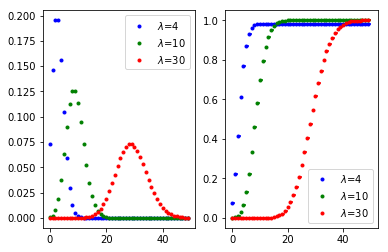

In [8]:
cycol = cycle('bgrcmk')

#funcion ditribucion poison
p = lambda k,l:(l**(k+1)*np.exp(-l))/math.factorial(k+1)
lamb= [4,10,30]
i=1
l=lamb[0]

print('Funcion creada') 
for i in range(len(lamb)):
    l=lamb[i]
    P = []
    c = next(cycol)
    for k in range(50): #k actua como el dominio
        P.append(p(k,l))
    plt.subplot(121)
    plt.plot(P,'o',c=c,label='$\lambda$=%s' % l, markersize=3)
#    plt.title('1) Densidad de distrución de probabilidad')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(np.cumsum(P),'o',c=c,label='$\lambda$=%s' % l, markersize=3)
#     plt.title('Distrución de probabilidad acumulada ')
    plt.legend()
    plt.hlines(np.cumsum(P),range(len(P)),range(1,len(P)+1),color=c)
    i+=1
print('Función de distribución poisson')
print('1. Distrución de probabilidad.')   
print('2. Distrución de probabilidad acumulada.')

plt.show()

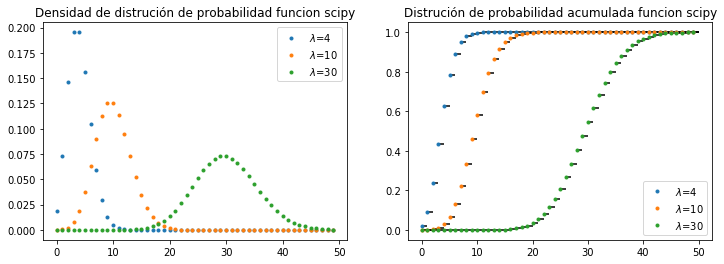

In [9]:
p = lambda k,l:(l**k*np.exp(-l))/sps.gamma(k+1)
k = np.arange(0,50)
l = [4,10,30]
P = np.asmatrix(list(map(lambda x:p(k,x*np.ones(len(k))),l))).T

plt.figure(1,figsize=[12,4])
plt.subplot(121)
plt.plot(P,'o',markersize=3)
plt.title('Densidad de distrución de probabilidad funcion scipy')
plt.legend(('$\lambda$=4','$\lambda$=10','$\lambda$=30'))

# Probabilidad acumulada 
P_ac = np.cumsum(P,axis=0)

plt.subplot(122)
plt.plot(P_ac,'o',markersize=3)
[plt.hlines(P_ac[:,i],range(len(P_ac)),range(1,len(P_ac)+1)) for i in range(len(l))]
plt.title('Distrución de probabilidad acumulada funcion scipy')
plt.legend(('$\lambda$=4','$\lambda$=10','$\lambda$=30'))
plt.show()


(array([0.105, 0.   , 0.   , 0.   , 0.   , 0.39 , 0.   , 0.   , 0.   ,
        0.   , 0.735, 0.   , 0.   , 0.   , 0.   , 1.055, 0.   , 0.   ,
        0.   , 0.   , 0.875, 0.   , 0.   , 0.   , 0.   , 0.705, 0.   ,
        0.   , 0.   , 0.   , 0.61 , 0.   , 0.   , 0.   , 0.   , 0.265,
        0.   , 0.   , 0.   , 0.   , 0.145, 0.   , 0.   , 0.   , 0.   ,
        0.095, 0.   , 0.   , 0.   , 0.02 ]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ]),
 <a list of 50 Patch objects>)

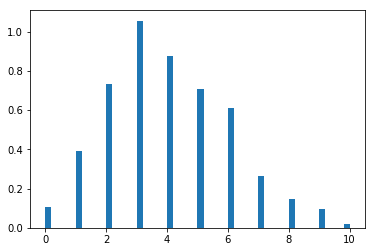

In [10]:
#histograma para lambda 4
N=1000;
mu = l[0]  # parametro de forma 
plt.hist(st.poisson.rvs(mu,size=N),50,density=True)

(array([0.0075, 0.    , 0.025 , 0.    , 0.    , 0.0425, 0.    , 0.09  ,
        0.    , 0.    , 0.1425, 0.    , 0.1825, 0.    , 0.    , 0.2725,
        0.    , 0.3075, 0.    , 0.    , 0.315 , 0.    , 0.34  , 0.    ,
        0.    , 0.24  , 0.    , 0.1975, 0.    , 0.    , 0.1375, 0.    ,
        0.1   , 0.    , 0.    , 0.04  , 0.    , 0.025 , 0.    , 0.    ,
        0.0125, 0.    , 0.0075, 0.    , 0.    , 0.0025, 0.    , 0.0075,
        0.    , 0.005 ]),
 array([ 2. ,  2.4,  2.8,  3.2,  3.6,  4. ,  4.4,  4.8,  5.2,  5.6,  6. ,
         6.4,  6.8,  7.2,  7.6,  8. ,  8.4,  8.8,  9.2,  9.6, 10. , 10.4,
        10.8, 11.2, 11.6, 12. , 12.4, 12.8, 13.2, 13.6, 14. , 14.4, 14.8,
        15.2, 15.6, 16. , 16.4, 16.8, 17.2, 17.6, 18. , 18.4, 18.8, 19.2,
        19.6, 20. , 20.4, 20.8, 21.2, 21.6, 22. ]),
 <a list of 50 Patch objects>)

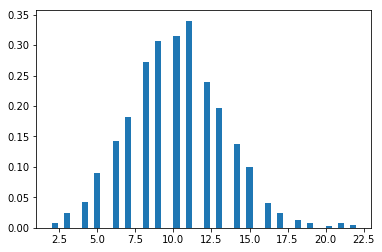

In [11]:
#histograma para lambda 10
N=1000;
mu = l[1]  # parametro de forma 
plt.hist(st.poisson.rvs(mu,size=N),50,density=True)

(array([0.00138889, 0.        , 0.00416667, 0.        , 0.00694444,
        0.01805556, 0.01944444, 0.        , 0.01944444, 0.03333333,
        0.        , 0.04583333, 0.04861111, 0.08333333, 0.        ,
        0.08611111, 0.08888889, 0.        , 0.10833333, 0.10833333,
        0.10694444, 0.        , 0.0875    , 0.08333333, 0.        ,
        0.08888889, 0.06944444, 0.07083333, 0.        , 0.05694444,
        0.03472222, 0.03888889, 0.        , 0.02222222, 0.01527778,
        0.        , 0.01805556, 0.00833333, 0.00972222, 0.        ,
        0.00138889, 0.00138889, 0.        , 0.        , 0.00138889,
        0.        , 0.        , 0.        , 0.        , 0.00138889]),
 array([15.  , 15.72, 16.44, 17.16, 17.88, 18.6 , 19.32, 20.04, 20.76,
        21.48, 22.2 , 22.92, 23.64, 24.36, 25.08, 25.8 , 26.52, 27.24,
        27.96, 28.68, 29.4 , 30.12, 30.84, 31.56, 32.28, 33.  , 33.72,
        34.44, 35.16, 35.88, 36.6 , 37.32, 38.04, 38.76, 39.48, 40.2 ,
        40.92, 41.64, 42.36, 43.08

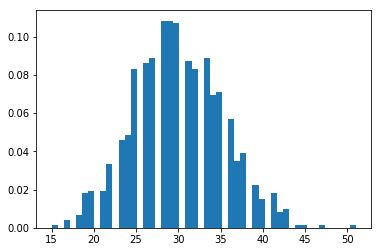

In [12]:
#histograma para lambda 30
N=1000;
mu = l[2]  # parametro de forma 
plt.hist(st.poisson.rvs(mu,size=N),50,density=True)

# 3
Demostrar **Teoricamente** usando el método de máxima verosimilitud, que los estimadores para los parámetros $\mu$ y $\sigma$ de una distribución normal, estan dados por:

$$\hat \mu = {1\over n}\sum_{i=1}^n x_i,\quad \hat  \sigma^2={1\over n}\sum_{i=1}^n (x_i-\hat \mu)^2$$

**Recuerde que:** La distribución normal es
$$f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

Reporte su respuesta usando markdown-latex

### Demostración máxima verosimilitud
Donde
  $$  \sigma^{2}=varianza$$
  $$\mu=media$$
Para una tupla de n números reales
  
$$L=(x_{1},x_{2},..x_{n},\mu,\sigma^{2})=\prod_{i=1}^{n}{\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}=(\frac{1}{\sqrt {2\pi \sigma ^{2}}})^{n}e^{-{\frac {\sum(x_{i}-\mu )^{2}}{2\sigma ^{2}}}}$$

Le calculamos el logaritmo:
$$log(L(x_{1},x_{2},..x_{n},\lambda))=-\frac{n}{2}log(\sigma^{2})-\frac{n}{2}log(2\pi)-\frac{1}{2\sigma^{2}}\sum(x_{i}-\mu )^{2}$$

Derivamos la ecuación:

Primero respecto a la media
$$\frac{\delta log(L(x_{1},x_{2},..x_{n},\lambda))}{\delta \mu}=\frac{n}{\sigma^{2}}\sum(x_{i}-\mu)$$

Despues respecto a la varianza
$$\frac{\delta log(L(x_{1},x_{2},..x_{n},\lambda))}{\delta \sigma^{2}}=-\frac{n}{2\sigma^{2}}+\frac{1}{2\sigma^{4}}\sum(x_{i}-\mu )^{2}$$

Anulandose y dando:
$$\hat \mu = {1\over n}\sum_{i=1}^n x_i,\quad \hat  \sigma^2={1\over n}\sum_{i=1}^n (x_i-\hat \mu)^2$$

# <font color = red> Nota: </font>

Recuerde que maximizar la función de máxima verosimilitud $L(\theta)$ es equivalente a maximizar su logaritmo $l(\theta)= ln(L(\theta))$

> Referencia: Resultados obtenidos del libro:  Paolo Brandimarte -Handbook in Monte Carlo Simulation

# 4
Un banco, de acuerdo a la ley, tienen la posibilidad de poder invertir las utilidades logradas por créditos de trabajo quirografarios en dos diferentes instrumentos de inversión: El primero es inversión en deuda que presenta una utilidad promedio del 23.5% con una desviación estándar de 1.1%. El segundo es inversión a plazo donde la rentabilidad esperada se comporta como una distribución uniforme y está entre el -2% y el 9%, pero nunca entre -0.5% y 0.5%. Calcular cuál es la mejor combinación posible, si la inversión será en múltiplos de 25%, es decir (inv1 25%, Inv2 75%)-(Inv1 50%,Inv2 50%)-(Inv1 75%, Inv2 25%), simular 1000 veces (escenarios) e indicar rendimientos promedio por combinación.

In [13]:
deuda=.235;stddeuda=.011
#corto plazo
mincp=-.02;maxcp=.09 #esto no puede estar entre -.005 y.005
nacc=-.005;nacg=.005
sims=1000
rdto=0
def inversion(invdeuda:'ponderacion que se invierte en deuda, lo que resta se invierte en corto plazo'):
    global rdto
    invplazo=1-invdeuda
    for i in range(sims):
        deu = np.random.normal(deuda,stddeuda)
        cp = np.random.uniform(mincp,maxcp)

        while cp>=nacc and cp<=nacg:
            cp = np.random.uniform(mincp,maxcp) 

        inv = invdeuda*deu+invplazo*cp
    rdto += inv
    print(rdto)
    return rdto



In [14]:
help(inversion)

Help on function inversion in module __main__:

inversion(invdeuda:'ponderacion que se invierte en deuda, lo que resta se invierte en corto plazo')



In [15]:
rdto=0
unc=.25
dosc=.5
tresc=.75
r=inversion(unc)
print('Si el inversionista invierte:',unc,'en deuda y ',1-unc,'en corto plazo, ganará: ',round(r*100,2),'%')

rdto=0
r=inversion(dosc)
print('Si el inversionista invierte:',dosc,'en deuda y ',1-dosc,'en corto plazo, ganará: ',round(r*100,2),'%')
rdto=0
r=inversion(tresc)
print('Si el inversionista invierte:',tresc,'en deuda y ',1-tresc,'en corto plazo, ganará: ',round(r*100,2),'%')
# r=inversion(tresc)
# r=r/sims
# pond=[.25,.5,.75]
#res=list(map(lambda x:inversion(x),pond))



0.04664044079235422
Si el inversionista invierte: 0.25 en deuda y  0.75 en corto plazo, ganará:  4.66 %
0.1439953086373866
Si el inversionista invierte: 0.5 en deuda y  0.5 en corto plazo, ganará:  14.4 %
0.20250401422065295
Si el inversionista invierte: 0.75 en deuda y  0.25 en corto plazo, ganará:  20.25 %


# 5
Considere la siguiente función de distribución de probabilidad
$$ f(x)=\begin{cases}400e^{-400(x-1)},& \text{para }x\geq 1\\0,& \text{otro caso}\end{cases}$$

a). Para realizar una comparación, realice el desarrollo analítico del valor esperado.

b). Realice el desarrollo teórico para obtener muestras aletorias de esta dstribución usando el método de la función inversa. Con los resultados obtenidos, genere 100 muestras y  grafique el histograma de dichas muestras aleatorias obtenidas y a su vez la función de densidad f(x), para validar los resultados obtenidos.

c). Repita el inciso anterior pero en esta ocasión utilice el método de aceptación y rechazo para generar las muestras aleatorias.

**Se desea estimar la media de esta distribución, usando el método montecarlo crudo y sus técnicas de reducción de varianza con muestras de tamaño 10,100 y 1000. Estas cantidades de muestras para cada uno de los siguientes literales:** 

d). Use el método de montecarlo crudo para estimar la media.

e). Use el método de muestreo estratificado con 5 estratos $0\leq F(x)\leq0.3, 0.3\leq F(x)\leq0.5, 0.5\leq F(x)\leq0.7, 0.7\leq F(x)\leq0.9 $ y $0.9\leq F(x) \leq 1$. Reparta el total de muestras en los estratos de la siguiente forma: estrato 1, 2, 3, 4, 5, 20%,20%,25%,15% y 20% de las muestras respectivamente.

f). Use el método de los números complementarios.

g). Finalmente use el método de estratificación en el cúal se divide en N estratos.

h). Compare todos los resulados obtenidos con cada método en una tabla unsando la librería pandas, donde muestre segun la cantidad de términos usados, la aproximación de la media aproximada y su error relativo con el valor obtenido en el inciso a).

a). Se debe de calcular el valor esperado de la función.

$$ E(f(x))=\int_a^b xf(x) dx $$.

$$E[f(x)]=\int_1^\infty x 400e^{-400(x-1)} dx$$.


Se integra la función en partes.


$$u=x \rightarrow du=dx$$          
$$dv=400e^{-400(x-1)} dx \rightarrow v=-e^{-400(x-1)}$$.




$$= -xe^{-400(x-1)}\Big|_1^\infty\ + \int_1^\infty e^{-400(x-1)}dx$$.


$$= -xe^{-400(x-1)} + [\frac{-1}{400}e^{-400(x-1)}]\Big|_1^\infty$$.

$$= -xe^{-400(x-1)} -\frac{1}{400}e^{-400(x-1)}\Big|_1^\infty$$.


$$ = 0 + 1 + \frac{1}{400} $$.

$$= \frac{401}{400} $$.

$$ = 1.0025 $$.

b). Realice el desarrollo teórico para obtener muestras aletorias de esta dstribución usando el método de la función inversa. Con los resultados obtenidos, genere 100 muestras y  grafique el histograma de dichas muestras aleatorias obtenidas y a su vez la función de densidad f(x), para validar los resultados obtenidos.

Histograma


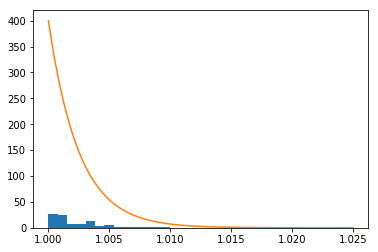

media con 100 simulaciones de la inversa es: 1.00259152225007


In [16]:
sims=100
print('Histograma')
datos = np.random.rand(sims)
d = np.linspace(1,1.025,sims)
inversa = (-np.log(datos)/400)+1
densidad = 400*np.exp(-400*(d-1))
plt.hist(inversa,25)
plt.plot(d,densidad)
plt.show()
invmean = np.mean(inversa)
print('media con',sims,'simulaciones de la inversa es:',invmean)

c). Repita el inciso anterior pero en esta ocasión utilice el método de aceptación y rechazo para generar las muestras aleatorias.

**Se desea estimar la media de esta distribución, usando el método montecarlo crudo y sus técnicas de reducción de varianza con muestras de tamaño 10,100 y 1000. Estas cantidades de muestras para cada uno de los siguientes literales:** 

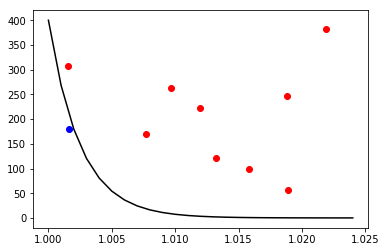

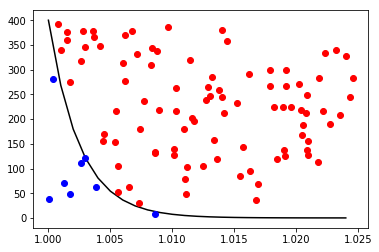

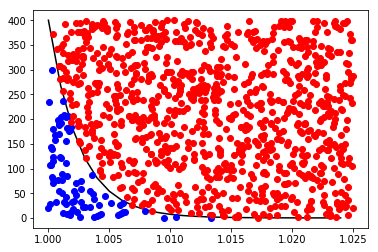

media con aceptacion y rechazo para  10  muestras es: 1.0132346063249664
media con aceptacion y rechazo para  100  muestras es: 1.0130769114963243
media con aceptacion y rechazo para  1000  muestras es: 1.0134552879090468


In [17]:
c = [10,100,1000]
f = lambda x: 400*np.exp(-400*(x-1))
x = np.arange(1,1.025,0.001)
plt.plot(x,f(x),'k')
for i in range(c[0]):
    u1 = np.random.uniform(1,1.025,1)
    u2 = np.random.uniform(0,400,1)
    if u2 <= f(u1):
        plt.plot(u1,u2,'ob')
    else:
        plt.plot(u1,u2,'or')
plt.show()
aceprec0 = np.mean(u1)
plt.plot(x,f(x),'k')
for i in range(c[1]):
    u1 = np.random.uniform(1,1.025,1)
    u2 = np.random.uniform(0,400,1)
    if u2 <= f(u1):
        plt.plot(u1,u2,'ob')
    else:
        plt.plot(u1,u2,'or')
plt.show()
aceprec1 = np.mean(u1)
plt.plot(x,f(x),'k')
for i in range(c[2]):
    u1 = np.random.uniform(1,1.025,1)
    u2 = np.random.uniform(0,400,1)
    if u2 <= f(u1):
        plt.plot(u1,u2,'ob')
    else:
        plt.plot(u1,u2,'or')
plt.show()
aceprec2 = np.mean(u1)
print('media con aceptacion y rechazo para ',c[0],' muestras es:',aceprec0)
print('media con aceptacion y rechazo para ',c[1],' muestras es:',aceprec1)
print('media con aceptacion y rechazo para ',c[2],' muestras es:',aceprec2)

d). Use el método de montecarlo crudo para estimar la media.

e). Use el método de muestreo estratificado con 5 estratos $0\leq F(x)\leq0.3, 0.3\leq F(x)\leq0.5, 0.5\leq F(x)\leq0.7, 0.7\leq F(x)\leq0.9 $ y $0.9\leq F(x) \leq 1$. Reparta el total de muestras en los estratos de la siguiente forma: estrato 1, 2, 3, 4, 5, 20%,20%,25%,15% y 20% de las muestras respectivamente.

f). Use el método de los números complementarios.



In [18]:
#funcion
xi=lambda u:(np.log(u1)+400)/400

N=d=1000


# aproximar el valor de la integral usando montecarlo típico
#u1=np.concatenate(r)#usando misma muestra
u1 = np.random.rand(N)#grnerando la muestra
f_u1 = list(map(xi,u1))
media_montecarlo = np.mean(f_u1)
#se necsita usar la misma muestra


#aproximar por el montecarlo estratizado
#estratos
e1=int(round(N*.2,0))
e2=int(round(N*.2,0))
e3=int(round(N*.25,0))
e4=int(round(N*.15,0))
e5=int(round(N*.2,0))
#e1
r1 = np.random.uniform(0,0.3,e1)
r2 = np.random.uniform(.3,.5,e2)
r3 = np.random.uniform(.5,.7,e3)
r4 = np.random.uniform(.7,.9,e3)
r5 = np.random.uniform(.9,1,e3)
r  = [r1,r2,r3,r4,r5]
m  = range(len(r))  # Cantidad de estratos
w  = [3/10/.6,3/10/.3,4/10/.1]
#xi = list(map(lambda r:-np.log(r),r))
x2=list(map(lambda r:np.array(list(map(xi,r))),r))
muestras = list(map(lambda wi,xi:xi/wi,w,x2))

mt_estrat=np.concatenate(muestras).mean()


# Aproximación usando método de los números complementarios
u2 = 1-u1
#f_u2 = list(map(f,u2))
f_u2 = list(map(xi,u2))
media_complementario = (np.mean(f_u2)+media_montecarlo)/2

print('Ejercicio para ',N,'muestras.')
print('D) Media usando montecarlo estándar     =',media_montecarlo)
print('E) Media usando montecarlo estratizado =',mt_estrat)
print('F) Media usando números complementarios =',media_complementario)


Ejercicio para  1000 muestras.
D) Media usando montecarlo estándar     = 0.9974201284474267
E) Media usando montecarlo estratizado = 1.0166012847637236
F) Media usando números complementarios = 0.9974201284474267


g). Finalmente use el método de estratificación en el cúal se divide en N estratos.

h). Compare todos los resulados obtenidos con cada método en una tabla unsando la librería pandas, donde muestre segun la cantidad de términos usados, la aproximación de la media aproximada y su error relativo con el valor obtenido en el inciso a).

In [19]:

def fmt_estrat(N:'Número de estratos'):
    '''Función que regresa variables aleatorias generadas en N reciones'''
    i = N
    u2 = np.random.rand(i)
    i2 = np.arange(0,i)
    vals = (u2+i2)/i
    return vals

In [20]:
print('Ejercicio F')
estr=[2,50,500]
muestras = list(map(fmt_estrat,estr))
rdn = list(map(lambda m_i:list(map(lambda m:xi(m),m_i)),muestras))
mean_estratos = list(map(lambda ei:np.mean(ei),rdn))
# imprimo los resultados obtenidos para cada estrato
prtn = list(map(lambda bi,mean:print('Estimacíon de la media para %i estratos es %2.4f'
                         %(bi,mean)),estr,mean_estratos))
#Al agregar más estratos se reduce la variación.

Ejercicio F
Estimacíon de la media para 2 estratos es 0.9974
Estimacíon de la media para 50 estratos es 0.9974
Estimacíon de la media para 500 estratos es 0.9974


In [21]:
print('Ejercicio G')

valuacion = ['Analítico', 'Función inversa','Aceptación y rechazo',
             'Aceptación y rechazo','Aceptación y rechazo','Montecarlo Crudo','Muestreo Estrtificado',
             '# Complementarios','ME para n estratos','ME para n estratos','ME para n estratos']
muestras = [1,100,c[0],c[1],c[2],d,d,d,estr[0],estr[1],estr[2]]
media = np.array([1.0025,invmean,aceprec0,aceprec1,aceprec2,media_montecarlo,mt_estrat,media_complementario,
                 mean_estratos[0],mean_estratos[1],mean_estratos[2]])
#muestras
#media
error = list(map(lambda x: abs((x-1.0025)/1.0025),media))
#error
df = pd.DataFrame(index=valuacion,columns=['Cantidad de términos','Media Calculada','Error'])
df.index.name = "Prueba"
df['Cantidad de términos'] = muestras
df['Media Calculada'] = media
df['Error'] = error
df

Ejercicio G


,Cantidad de términos,Media Calculada,Error
Prueba,,,
Analítico,1,1.002500,0.000000
Función inversa,100,1.002592,0.000091
Aceptación y rechazo,10,1.013235,0.010708
Aceptación y rechazo,100,1.013077,0.010551
Aceptación y rechazo,1000,1.013455,0.010928
Montecarlo Crudo,1000,0.997420,0.005067
Muestreo Estrtificado,1000,1.016601,0.014066
# Complementarios,1000,0.997420,0.005067
ME para n estratos,2,0.997420,0.005067


# 6
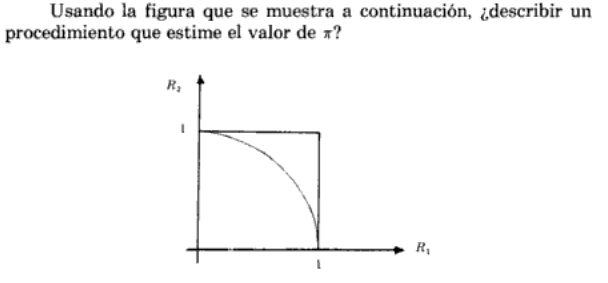

## <font color = 'red'> Nota: </font> Use el método de integración montecarlo visto en clase.
    
a). Use el método de montecarlo para aproximar el valor de pi para muestras de tamaño 100,1000,10000,1000000 y comparelo con su valor real. 

b). Repita el inciso anterior usando todos los método de reducción de varianza utilizados en el ejercicio *6*, para constrastar los resultados . Explique sus resultados.

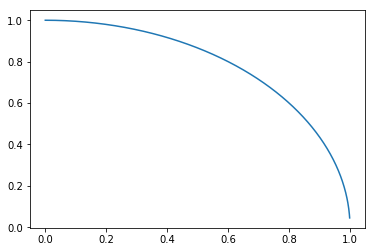

In [22]:
piper=(np.pi)/4
# tamano=[100,1000,10000,1000000]
#le quite cero al ultimo, ya que arroja error de memoria.
tamano=[100,1000,10000,100000]
f = lambda x:np.sqrt(1-x**2)
# Validación de la función creada
x = np.arange(0,1,0.001)
plt.plot(x,list(map(f,x)))
plt.show()

In [23]:
xi = lambda u:np.sqrt(1-x**2)
N=tamano[0]


# aproximar el valor de la integral usando montecarlo típico
#u1=np.concatenate(r)#usando misma muestra
u1 = np.random.rand(N)#grnerando la muestra
f_u1 = list(map(xi,u1))
media_montecarlo = np.mean(f_u1)
#se necsita usar la misma muestra


#aproximar por el montecarlo estratizado
#estratos
e1=int(round(N*.3,0))
e2=int(round(N*.3,0))
e3=int(round(N*.4,0))
#e1
r1 = np.random.uniform(0,0.6,e1)
r2 = np.random.uniform(.6,.9,e2)
r3 = np.random.uniform(.9,1,e3)
r  = [r1,r2,r3]
m  = range(len(r))  # Cantidad de estratos
w  = [3/10/.6,3/10/.3,4/10/.1]
#xi = list(map(lambda r:-np.log(r),r))
x2=list(map(lambda r:np.array(list(map(xi,r))),r))
muestras = list(map(lambda wi,xi:xi/wi,w,x2))

mt_estrat=np.concatenate(muestras).mean()


# Aproximación usando método de los números complementarios
u2 = 1-u1
#f_u2 = list(map(f,u2))
f_u2 = list(map(xi,u2))
media_complementario = (np.mean(f_u2)+media_montecarlo)/2

print('Ejercicio para ',N,'muestras.')
print('Valor de pi real para el periodo 0->1: ',piper)
print('Media usando montecarlo estándar     =',media_montecarlo)
print('Media usando montecarlo estratizado =',mt_estrat)
print('Media usando números complementarios =',media_complementario)

Ejercicio para  100 muestras.
Valor de pi real para el periodo 0->1:  0.7853981633974483
Media usando montecarlo estándar     = 0.7858888667277569
Media usando montecarlo estratizado = 0.7858888667277569
Media usando números complementarios = 0.7858888667277569


In [24]:
xi = lambda u:np.sqrt(1-x**2)
N=tamano[1]


# aproximar el valor de la integral usando montecarlo típico
#u1=np.concatenate(r)#usando misma muestra
u1 = np.random.rand(N)#grnerando la muestra
f_u1 = list(map(xi,u1))
media_montecarlo = np.mean(f_u1)
#se necsita usar la misma muestra


#aproximar por el montecarlo estratizado
#estratos
e1=int(round(N*.3,0))
e2=int(round(N*.3,0))
e3=int(round(N*.4,0))
#e1
r1 = np.random.uniform(0,0.6,e1)
r2 = np.random.uniform(.6,.9,e2)
r3 = np.random.uniform(.9,1,e3)
r  = [r1,r2,r3]
m  = range(len(r))  # Cantidad de estratos
w  = [3/10/.6,3/10/.3,4/10/.1]
#xi = list(map(lambda r:-np.log(r),r))
x2=list(map(lambda r:np.array(list(map(xi,r))),r))
muestras = list(map(lambda wi,xi:xi/wi,w,x2))

mt_estrat=np.concatenate(muestras).mean()


# Aproximación usando método de los números complementarios
u2 = 1-u1
#f_u2 = list(map(f,u2))
f_u2 = list(map(xi,u2))
media_complementario = (np.mean(f_u2)+media_montecarlo)/2

print('Ejercicio para ',N,'muestras.')
print('Valor de pi real para el periodo 0->1: ',piper)
print('Media usando montecarlo estándar     =',media_montecarlo)
print('Media usando montecarlo estratizado =',mt_estrat)
print('Media usando números complementarios =',media_complementario)

Ejercicio para  1000 muestras.
Valor de pi real para el periodo 0->1:  0.7853981633974483
Media usando montecarlo estándar     = 0.7858888667277568
Media usando montecarlo estratizado = 0.7858888667277567
Media usando números complementarios = 0.7858888667277568


In [25]:
xi = lambda u:np.sqrt(1-x**2)
N=tamano[2]


# aproximar el valor de la integral usando montecarlo típico
#u1=np.concatenate(r)#usando misma muestra
u1 = np.random.rand(N)#grnerando la muestra
f_u1 = list(map(xi,u1))
media_montecarlo = np.mean(f_u1)
#se necsita usar la misma muestra


#aproximar por el montecarlo estratizado
#estratos
e1=int(round(N*.3,0))
e2=int(round(N*.3,0))
e3=int(round(N*.4,0))
#e1
r1 = np.random.uniform(0,0.6,e1)
r2 = np.random.uniform(.6,.9,e2)
r3 = np.random.uniform(.9,1,e3)
r  = [r1,r2,r3]
m  = range(len(r))  # Cantidad de estratos
w  = [3/10/.6,3/10/.3,4/10/.1]
#xi = list(map(lambda r:-np.log(r),r))
x2=list(map(lambda r:np.array(list(map(xi,r))),r))
muestras = list(map(lambda wi,xi:xi/wi,w,x2))

mt_estrat=np.concatenate(muestras).mean()


# Aproximación usando método de los números complementarios
u2 = 1-u1
#f_u2 = list(map(f,u2))
f_u2 = list(map(xi,u2))
media_complementario = (np.mean(f_u2)+media_montecarlo)/2

print('Ejercicio para ',N,'muestras.')
print('Valor de pi real para el periodo 0->1: ',piper)
print('Media usando montecarlo estándar     =',media_montecarlo)
print('Media usando montecarlo estratizado =',mt_estrat)
print('Media usando números complementarios =',media_complementario)

Ejercicio para  10000 muestras.
Valor de pi real para el periodo 0->1:  0.7853981633974483
Media usando montecarlo estándar     = 0.7858888667277576
Media usando montecarlo estratizado = 0.7858888667277568
Media usando números complementarios = 0.7858888667277576


In [26]:
xi = lambda u:np.sqrt(1-x**2)
N=tamano[3]


# aproximar el valor de la integral usando montecarlo típico
#u1=np.concatenate(r)#usando misma muestra
u1 = np.random.rand(N)#grnerando la muestra
f_u1 = list(map(xi,u1))
media_montecarlo = np.mean(f_u1)
#se necsita usar la misma muestra


#aproximar por el montecarlo estratizado
#estratos
e1=int(round(N*.3,0))
e2=int(round(N*.3,0))
e3=int(round(N*.4,0))
#e1
r1 = np.random.uniform(0,0.6,e1)
r2 = np.random.uniform(.6,.9,e2)
r3 = np.random.uniform(.9,1,e3)
r  = [r1,r2,r3]
m  = range(len(r))  # Cantidad de estratos
w  = [3/10/.6,3/10/.3,4/10/.1]
#xi = list(map(lambda r:-np.log(r),r))
x2=list(map(lambda r:np.array(list(map(xi,r))),r))
muestras = list(map(lambda wi,xi:xi/wi,w,x2))

mt_estrat=np.concatenate(muestras).mean()


# Aproximación usando método de los números complementarios
u2 = 1-u1
#f_u2 = list(map(f,u2))
f_u2 = list(map(xi,u2))
media_complementario = (np.mean(f_u2)+media_montecarlo)/2

print('Ejercicio para ',N,'muestras.')
print('Valor de pi real para el periodo 0->1: ',piper)
print('Media usando montecarlo estándar     =',media_montecarlo)
print('Media usando montecarlo estratizado =',mt_estrat)
print('Media usando números complementarios =',media_complementario)
#da error de memoria

Ejercicio para  100000 muestras.
Valor de pi real para el periodo 0->1:  0.7853981633974483
Media usando montecarlo estándar     = 0.7858888667277706
Media usando montecarlo estratizado = 0.7858888667277559
Media usando números complementarios = 0.7858888667277706


**Valor de los ejercicios**
- 1- 2 puntos
- 2- 2 puntos
- 3- 1 punto
- 4- 1 punto
- 5- 3 puntos
- 6- 1 punto

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>